# Estate Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
houses = pd.read_csv('HousingData.csv')

In [3]:
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,3.25,36.2


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
 houses['CHAS'].value_counts()

0    472
1     34
Name: CHAS, dtype: int64

In [6]:
houses.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.491383,11.110672,11.098431,0.067194,0.554695,6.284634,68.349723,3.795043,9.549407,408.237154,18.455534,356.674032,12.778379,22.532806
std,8.567735,23.243558,6.869255,0.250605,0.115878,0.702617,28.201639,2.105710,8.707259,168.537116,2.164946,91.294864,7.242243,9.197104
min,0.000430,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082268,0.000000,5.145000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,7.037500,17.025000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.465000,21.200000
75%,2.897595,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,17.057500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

# Train_test

In [9]:
np.random.seed(42)
def train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))

    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = train_test(houses, 0.2)

In [11]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)})\n")

Rows in train set: 405
Rows in test set: 101)



In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(houses, test_size=0.2, random_state=42)   

In [13]:
 print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)})\n") 

Rows in train set: 404
Rows in test set: 102)



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(houses, houses['CHAS']):
    strat_train_set = houses.loc[train_index]
    strat_test_set = houses.loc[test_index]

# Correlations

In [15]:
corr_matrix = houses.corr()

In [16]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.363456
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.365636
RAD       -0.381626
CRIM      -0.384131
NOX       -0.427321
TAX       -0.468536
INDUS     -0.482138
PTRATIO   -0.507787
LSTAT     -0.723816
Name: MEDV, dtype: float64

In [17]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

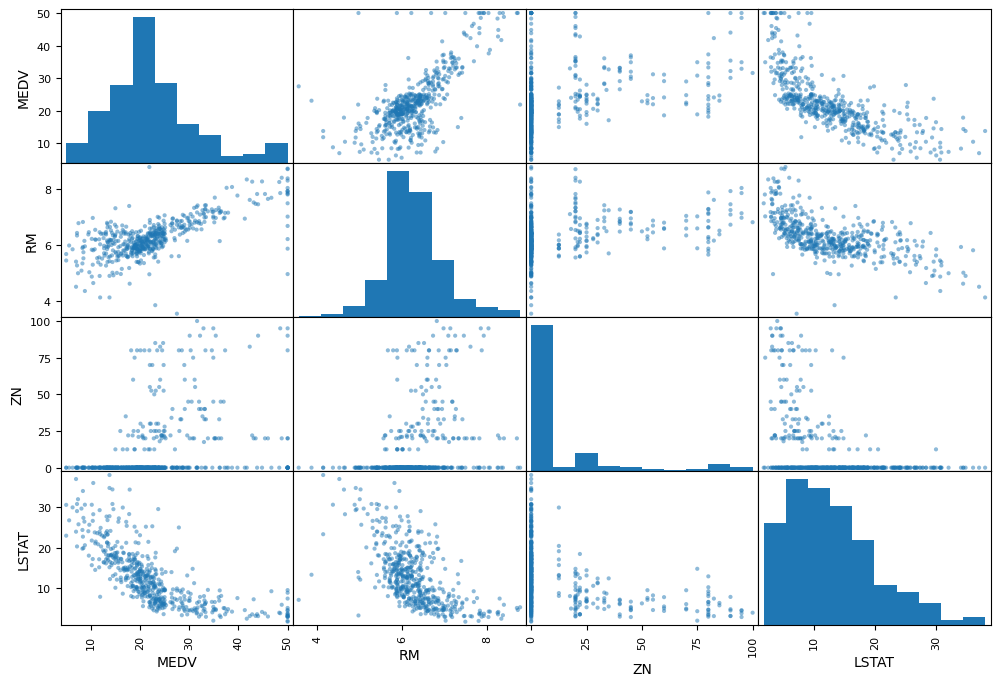

In [18]:
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(houses[attributes], figsize = (12,8))

# Attributes

In [19]:
houses = strat_train_set.drop('MEDV', axis=1)
houses_labels = strat_train_set['MEDV'].copy()

In [20]:
houses['TAXRM']= houses['TAX']/houses['RM']

In [21]:
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,112.957938
318,0.40202,0.0,9.90,0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36,47.633971
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,34.416544
316,0.31827,0.0,9.90,0,0.544,5.914,71.2,3.9986,4,304,18.4,390.70,18.33,51.403449
431,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69,97.468169


In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.363456
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.365636
RAD       -0.381626
CRIM      -0.384131
NOX       -0.427321
TAX       -0.468536
INDUS     -0.482138
PTRATIO   -0.507787
LSTAT     -0.723816
Name: MEDV, dtype: float64

In [23]:
  houses.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000
mean,3.710639,10.810644,11.257812,0.066832,0.557777,6.280760,69.421436,3.745757,9.745050,411.539604,18.489109,353.730421,12.92547,67.253766
std,9.192261,22.893716,6.849419,0.250040,0.116376,0.702466,27.807645,2.095471,8.723025,168.190814,2.135190,95.032131,7.31933,31.115760
min,0.000430,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.73000,24.645639
25%,0.090672,0.000000,5.190000,0.000000,0.453000,5.878750,45.800000,2.042200,4.000000,283.250000,17.400000,374.650000,7.00750,44.801475
50%,0.289575,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.107300,5.000000,341.000000,19.100000,390.975000,11.73000,55.243423
75%,3.489463,12.500000,18.100000,0.000000,0.625750,6.620500,94.300000,5.100400,24.000000,666.000000,20.200000,395.945000,17.13000,98.317507
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,187.026116


# Scikit-Learn : Pipeline

In [24]:
 from sklearn.pipeline import Pipeline

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [26]:
houses_num = my_pipeline.fit_transform(houses)

In [27]:
houses_num

array([[ 1.32336599, -0.47279558,  1.00018293, ..., -3.64591946,
         1.56827812,  1.47066443],
       [-0.36038156, -0.47279558, -0.19848333, ...,  0.43702072,
        -0.35094077, -0.63132387],
       [-0.39028938, -0.47279558, -0.63555798, ...,  0.33376984,
        -1.10604329, -1.05663295],
       ...,
       [-0.14509168, -0.47279558,  1.00018293, ...,  0.17910424,
         0.05670515,  1.48614199],
       [-0.39816335,  0.97043527, -1.32698376, ...,  0.42090094,
        -0.82014397, -1.17686923],
       [ 0.85691821, -0.47279558,  1.00018293, ...,  0.45482623,
         1.74474229,  2.09137226]])

# Desired Model For House Predictor

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(houses_num, houses_labels)

RandomForestRegressor()

In [29]:
some_data = houses.iloc[:5]

In [30]:
some_labels = houses_labels.iloc[:5]

In [31]:
prepared_data = my_pipeline.transform(some_data)

In [32]:
model.predict(prepared_data)

array([ 8.762, 22.619, 28.083, 18.226, 15.822])

In [33]:
list(some_labels) 

[8.3, 23.1, 26.6, 17.8, 14.1]

In [34]:
from sklearn.metrics import mean_squared_error
houses_prediction = model.predict(houses_num)
mse = mean_squared_error(houses_labels, houses_prediction)
rmse = np.sqrt(mse)

In [35]:
mse

1.6012388638613835

# Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, houses_num, houses_labels, scoring= 'neg_mean_squared_error', cv=10  )
rmse_scores = np.sqrt(-scores)

In [37]:
rmse_scores

array([4.73347879, 3.41478126, 2.66108777, 2.94449971, 6.76689366,
       3.00227775, 2.64795438, 3.72946542, 2.59827424, 2.83397078])

In [38]:
 def print_scores(scores):
        print('Scores:', scores)
        print('Mean:', scores.mean())
        print('Standerd deviation:', scores.std())

In [39]:
print_scores(rmse_scores)

Scores: [4.73347879 3.41478126 2.66108777 2.94449971 6.76689366 3.00227775
 2.64795438 3.72946542 2.59827424 2.83397078]
Mean: 3.5332683757001555
Standerd deviation: 1.2444147449593768


# Saving Model

In [40]:
from joblib import dump, load
dump(model, 'House Predictor.joblib')

['House Predictor.joblib']

# Testing of Model

In [49]:
X_test = strat_test_set
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[34.066 10.216 26.901 28.845 18.874 15.609 20.785 15.744 35.165 31.439
 21.036 13.06  22.543 20.61  26.075 12.832 34.071 15.166 25.58  27.123
 23.51  17.874 10.    28.693 22.804 27.764 16.125 29.624  8.462 33.921
 26.999 24.01  23.096 12.162 23.91  18.591 31.501 28.342 26.332 25.8
 20.195 44.734 22.706 27.017 18.595 27.866 34.884 25.253 23.822 25.312
 25.615 15.111 27.311 22.165 28.405 26.529 43.708 30.724 21.365 26.035
 29.196  8.997 25.278 41.439 16.992 35.073 48.76  20.85  22.735 31.065
 45.492 28.644 30.165 27.917 45.16  15.894 22.78  26.835 27.245 28.169
 25.843 26.686 14.933 28.329 25.122 25.22  12.291 25.528 27.331 26.891
 22.848 28.209 13.944 25.486 17.876 35.074 23.611 32.353 16.661 28.737
 22.921 26.105] [32.7, 13.1, 28.7, 26.7, 14.4, 15.6, 19.4, 12.6, 33.3, 32.4, 23.1, 13.8, 22.6, 11.9, 21.1, 11.3, 35.4, 13.5, 21.0, 27.5, 19.2, 19.5, 10.2, 29.4, 18.6, 24.8, 15.2, 24.4, 8.8, 30.3, 22.0, 20.6, 23.1, 13.3, 23.8, 13.8, 33.8, 24.7, 19.4, 20.9, 22.5, 48.8, 22.7, 23.4, 19.5, 26.4, 

C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MEDV
Feature names seen at fit time, yet now missing:
- TAXRM

  warnings.warn(message, FutureWarning)


In [46]:
final_rmse

4.113810621957857